In [151]:
import yfinance as yf
import talib
import pandas as pd

# Descargar los datos del S&P 500
ticker = "^GSPC"
data = yf.download(ticker, start="2000-01-01", end="2024-01-01")
data.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed


In [152]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [153]:
# Calcular los retornos diarios
data['Returns'] = data['Close'].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090


In [154]:
data['Previous_Return'] = data['Returns'].shift(-1)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return
Date,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,-0.038345
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345,0.001922
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922,0.000956
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956,0.027090
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090,0.011190


In [155]:
data.dropna(inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return
Date,,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345,0.001922
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922,0.000956
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956,0.027090
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090,0.011190
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,0.011190,-0.013063


<Axes: xlabel='Date'>

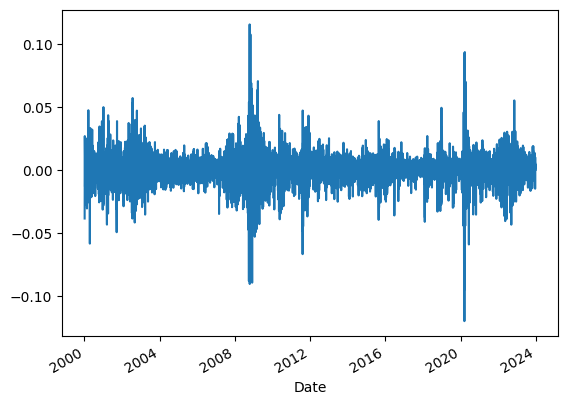

In [156]:
data['Returns'].plot()

<Axes: >

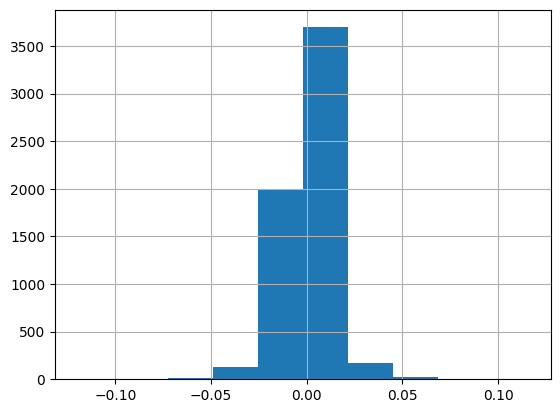

In [157]:
data['Returns'].hist()

In [158]:
data['Returns'].describe()

count    6035.000000
mean        0.000274
std         0.012361
min        -0.119841
25%        -0.004874
50%         0.000589
75%         0.005937
max         0.115800
Name: Returns, dtype: float64

In [159]:
import numpy as np

# Calcular la media y la desviación estándar de los retornos
mean_return = data['Returns'].mean()
std_return = data['Returns'].std()

# Aplicar las condiciones para categorizar los retornos
def categorize_return(ret, rate=0.5):
    if ret > mean_return + rate*std_return:
        return 1
    elif ret < mean_return - rate*std_return:
        return 2
    else:
        return 0

# Aplicar la función a la columna 'Returns'
data['Returns_cat'] = data['Previous_Return'].apply(categorize_return)
data.head()


,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return,Returns_cat
Date,,,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-0.038345,0.001922,0
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,0.001922,0.000956,0
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,0.000956,0.027090,1
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.027090,0.011190,1
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,0.011190,-0.013063,2


In [160]:
# Contar la frecuencia de cada clase en 'Returns_cat'
class_counts = data['Returns_cat'].value_counts()

# Mostrar el resultado
print(class_counts)


Returns_cat
0    3286
1    1404
2    1345
Name: count, dtype: int64


In [161]:
# Calcular los indicadores técnicos
data['PLUS_DM'], data['MINUS_DM'] = talib.PLUS_DM(data['High'], data['Low']), talib.MINUS_DM(data['High'], data['Low'])
data['PLUS_DI'], data['MINUS_DI'] = talib.PLUS_DI(data['High'], data['Low'], data['Close']), talib.MINUS_DI(data['High'], data['Low'], data['Close'])
data['DX'] = talib.DX(data['High'], data['Low'], data['Close'])
data['ADX'] = talib.ADX(data['High'], data['Low'], data['Close'])
data['ADXR'] = talib.ADXR(data['High'], data['Low'], data['Close'])
data['APO'] = talib.APO(data['Close'])
data['PPO'] = talib.PPO(data['Close'])
data['AROON_UP'], data['AROON_DOWN'] = talib.AROON(data['High'], data['Low'])
data['AROONOSC'] = talib.AROONOSC(data['High'], data['Low'])
data['BOP'] = talib.BOP(data['Open'], data['High'], data['Low'], data['Close'])
data['CCI'] = talib.CCI(data['High'], data['Low'], data['Close'])
data['CMO'] = talib.CMO(data['Close'])
data['MACD'], data['MACD_SIGNAL'], data['MACD_HIST'] = talib.MACD(data['Close'])
data['MFI'] = talib.MFI(data['High'], data['Low'], data['Close'], data['Volume'])
data['MOM'] = talib.MOM(data['Close'])
data['RSI'] = talib.RSI(data['Close'])
data['STOCH_SLOWK'], data['STOCH_SLOWD'] = talib.STOCH(data['High'], data['Low'], data['Close'])
data['ULTOSC'] = talib.ULTOSC(data['High'], data['Low'], data['Close'])
data['WILLR'] = talib.WILLR(data['High'], data['Low'], data['Close'])

data.dropna(inplace=True)

# Mostrar las primeras filas del DataFrame con los indicadores
data.head()


,Open,High,Low,Close,Adj Close,Volume,Returns,Previous_Return,Returns_cat,PLUS_DM,...,MACD,MACD_SIGNAL,MACD_HIST,MFI,MOM,RSI,STOCH_SLOWK,STOCH_SLOWD,ULTOSC,WILLR
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-02,1379.189941,1386.560059,1370.349976,1381.760010,1381.760010,1198600000,0.001863,0.019837,1,62.156615,...,-15.511020,-17.821815,2.310795,44.969506,-5.910034,49.990387,92.229426,73.568433,55.534039,-38.219205
2000-03-03,1381.760010,1410.880005,1381.760010,1409.170044,1409.170044,1150300000,0.019837,-0.012695,2,82.036803,...,-11.298807,-16.517214,5.218407,52.302202,20.910034,56.812397,94.296044,88.343600,60.571272,-1.992728
2000-03-06,1409.170044,1409.739990,1384.750000,1391.280029,1391.280029,1029000000,-0.012695,-0.025631,2,76.177031,...,-9.297002,-15.073171,5.776169,51.933285,45.190063,51.841631,86.335263,90.953578,56.213873,-22.841117
2000-03-07,1391.280029,1399.209961,1349.989990,1355.619995,1355.619995,1314100000,-0.025631,0.008173,1,70.735815,...,-10.467363,-14.152010,3.684647,44.104635,3.449951,43.644443,58.686063,79.772456,51.386710,-64.398056
2000-03-08,1355.619995,1373.790039,1346.619995,1366.699951,1366.699951,1203000000,0.008173,0.025602,1,65.683257,...,-10.381155,-13.397839,3.016684,43.653110,6.010010,46.476312,36.432966,60.484764,52.985838,-51.485868


In [162]:
import os

In [163]:
folder_path = 'data'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

file_path = os.path.join(folder_path, 'sp500.csv')    

In [164]:
data.to_csv(file_path)

### Create the Model

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [166]:
# Seleccionar las características y la variable objetivo
X = data[['PLUS_DM', 'MINUS_DM', 'PLUS_DI', 'MINUS_DI', 'DX', 'ADX', 'ADXR', 'APO', 'PPO', 
          'AROON_UP', 'AROON_DOWN', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'MACD', 'MACD_SIGNAL', 
          'MACD_HIST', 'MFI', 'MOM', 'RSI', 'STOCH_SLOWK', 'STOCH_SLOWD', 'ULTOSC', 'WILLR']]
y = data['Returns_cat']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [167]:
X_test

,PLUS_DM,MINUS_DM,PLUS_DI,MINUS_DI,DX,ADX,ADXR,APO,PPO,AROON_UP,...,MACD,MACD_SIGNAL,MACD_HIST,MFI,MOM,RSI,STOCH_SLOWK,STOCH_SLOWD,ULTOSC,WILLR
Date,,,,,,,,,,,,,,,,,,,,,
2009-09-23,70.076026,26.892020,35.966362,13.802268,44.534265,33.477011,30.378232,21.575005,2.089852,0.000000,...,18.569343,17.232976,1.336368,86.225038,27.500000,63.827072,56.193048,70.445510,59.603651,-21.934043
2007-10-16,63.912756,40.472169,28.204398,17.860177,22.455913,28.433988,24.751785,23.866534,1.562377,0.000000,...,16.495341,18.453438,-1.958097,56.389613,-8.099976,53.792868,26.455128,39.931451,51.346323,-69.426901
2010-02-16,49.436912,61.189657,20.557333,25.444472,10.623800,31.642786,26.754114,-24.324626,-2.206466,57.142857,...,-10.823986,-11.317927,0.493941,39.188706,5.680054,50.450274,91.375990,75.591711,65.028613,-16.370560
2010-03-02,51.597312,45.865874,26.121045,23.219515,5.880618,18.883836,26.178604,11.660066,1.068490,7.142857,...,2.755564,-1.479035,4.234599,70.200494,23.440063,58.448364,85.074547,76.357453,65.110895,-8.031664
2008-03-24,123.390597,104.535454,27.340415,23.162564,8.272482,19.941182,20.931518,-23.936991,-1.797913,71.428571,...,-9.776354,-14.507281,4.730927,43.592482,56.510010,53.794084,75.095179,69.805697,59.321998,-9.542397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-10-25,42.237795,15.831129,33.581633,12.586716,45.474696,31.491641,29.815039,16.753788,1.240879,28.571429,...,14.927819,14.189885,0.737934,71.289432,32.270020,77.370954,96.440660,88.103360,74.795236,-3.471562
2022-07-08,268.183082,306.190714,22.937231,26.187957,6.617229,20.254511,23.331423,-50.183924,-1.289544,7.142857,...,-36.734142,-57.825290,21.091148,62.406641,103.649902,50.498027,88.324305,72.508730,69.638867,-15.042631
2014-02-03,28.618776,105.830891,10.642676,39.356114,57.428267,29.442332,24.973693,-17.559552,-0.963503,100.000000,...,-12.531520,-2.902257,-9.629263,39.881514,-96.809937,31.235862,29.550005,28.054958,35.878999,-97.994260


### Standaricer Features

In [169]:
# Estandarizar las variables predictoras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

### Train the Model

In [170]:
# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, penalty='l1', solver='saga')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [171]:
model.coef_

array([[ 0.        , -0.20870478,  0.        ,  0.2380017 ,  0.04186446,
        -0.03845289, -0.08634926,  0.        , -0.08229538,  0.        ,
         0.0274661 ,  0.        ,  0.        ,  0.        ,  0.44603088,
         0.        ,  0.        ,  0.        , -0.0103372 , -0.09278879,
         0.44603088, -0.04212594,  0.        , -0.15196769,  0.09600598],
       [-0.00243693,  0.18229887,  0.01179674, -0.07107265, -0.10081271,
         0.19666201,  0.        , -0.23311566,  0.16633939, -0.03929298,
        -0.02905489,  0.        , -0.00528168,  0.0850611 , -0.14370954,
         0.26216762,  0.        ,  0.07469347,  0.        ,  0.        ,
        -0.14370954,  0.02881555, -0.1507011 ,  0.        ,  0.        ],
       [ 0.09781838,  0.        , -0.07949662,  0.        ,  0.        ,
         0.        ,  0.01238906,  0.        ,  0.        ,  0.00085898,
         0.        ,  0.        ,  0.0282709 ,  0.        ,  0.        ,
        -0.06951853,  0.        , -0.05856843,  0

In [172]:
# Realizar predicciones
y_pred = model.predict(X_test_scaled)


In [173]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.572977481234362
Confusion Matrix:
 [[605  58   8]
 [209  70   8]
 [181  48  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.90      0.73       671
           1       0.40      0.24      0.30       287
           2       0.43      0.05      0.09       241

    accuracy                           0.57      1199
   macro avg       0.48      0.40      0.37      1199
weighted avg       0.52      0.57      0.50      1199



In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

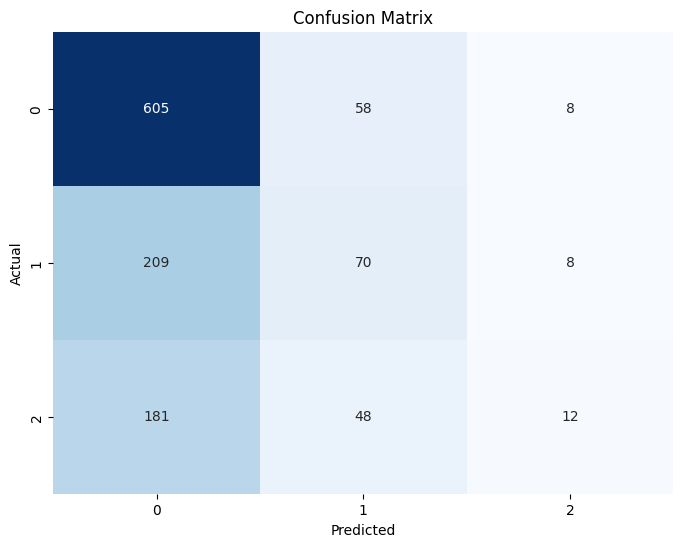

In [175]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Backtesting

In [176]:
import pandas_ta as ta
from tqdm import tqdm
tqdm.pandas()

# Asegúrate de que `data` y `X_test` están alineados correctamente
data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

def total_signal(df, current_row, model, scaler):

    # Accede a la fila usando índices numéricos
    X = df.loc[current_row, ['PLUS_DM', 'MINUS_DM', 'PLUS_DI', 'MINUS_DI', 'DX', 'ADX', 'ADXR', 'APO', 'PPO', 
          'AROON_UP', 'AROON_DOWN', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'MACD', 'MACD_SIGNAL', 
          'MACD_HIST', 'MFI', 'MOM', 'RSI', 'STOCH_SLOWK', 'STOCH_SLOWD', 'ULTOSC', 'WILLR']]
    
    # Reformatea X para que tenga 2 dimensiones
    X = X.values.reshape(1, -1)  # Convertir a una matriz 2D con una muestra

    # Transformar los datos usando el escalador
    X_scaler = scaler.transform(X)
    
    # Realizar la predicción
    y_predict = model.predict(X_scaler)
    
    return y_predict[0]

data['TotalSignal'] = data.progress_apply(lambda row: total_signal(data, row.name, model, scaler ), axis=1)


100%|██████████| 5995/5995 [00:10<00:00, 592.09it/s]


In [183]:
# Contar la frecuencia de cada clase en 'Returns_cat'
class_counts = data['TotalSignal'].value_counts()

# Mostrar el resultado
print(class_counts)


TotalSignal
0    5047
1     830
2     118
Name: count, dtype: int64


In [184]:
# Filtrar el DataFrame para obtener datos solo del mes de marzo
# df_month = data[data.index.month == 6]
def SIGNAL():
    return data.TotalSignal

In [210]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 1
    slcoef = 18
    TPSLRatio = 2
    slatr = 10

    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        #slatr = self.slcoef*self.data.ATR[-1]
        slatr = self.slatr
        TPSLRatio = self.TPSLRatio

        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

        elif self.signal1==1 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(data, MyStrat, cash=6000, margin=1/100)

C:\Users\Reinier\AppData\Local\Temp\ipykernel_183136\4081576805.py:30: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  bt = Backtest(data, MyStrat, cash=6000, margin=1/100)


In [211]:
result = bt.run()
result

Start                                     0.0
End                                    5994.0
Duration                               5994.0
Exposure Time [%]                   17.964971
Equity Final [$]                  4753.779541
Equity Peak [$]                   7063.178955
Return [%]                         -20.770341
Buy & Hold Return [%]              246.178067
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -32.873713
Avg. Drawdown [%]                   -0.884983
Max. Drawdown Duration                 2081.0
Avg. Drawdown Duration              72.766667
# Trades                                858.0
Win Rate [%]                         30.18648
Best Trade [%]                       2.767175
Worst Trade [%]                     -2.733978
Avg. Trade [%]                    

In [212]:
bt.plot()

Row(id='7399', ...)